Ships and Bikes model:

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import random
import requests
import cv2
import PIL.Image
import urllib
import matplotlib.pyplot as plt
%matplotlib inline
%tensorflow_version 2.x

import tensorflow as tf
print(tf.__version__)


2.4.1


In [2]:
ships_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289")#ship synset
print(ships_page.content)
# BeautifulSoup is an HTML parsing library
ships_soup = BeautifulSoup(ships_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

bikes_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02834778")#bicycle synset
print(bikes_page.content)
# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
bikes_soup = BeautifulSoup(bikes_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

b"http://static.flickr.com/85/233578996_8f74463083.jpg\r\nhttp://farm3.static.flickr.com/2317/2472759369_f4cc1ff8a0.jpg\r\nhttp://static.flickr.com/2173/2071797511_200e3e4d2e.jpg\r\nhttp://farm2.static.flickr.com/1019/534041866_3aa182311c.jpg\r\nhttp://static.flickr.com/88/231940102_7beb5ecf3e.jpg\r\nhttp://farm4.static.flickr.com/3138/2724596903_d74dd64821.jpg\r\nhttp://static.flickr.com/174/453920264_9406e9972c.jpg\r\nhttp://farm2.static.flickr.com/1419/1408865234_caf87d02e3.jpg\r\nhttp://farm1.static.flickr.com/147/423542865_c091691a6b.jpg\r\nhttp://farm3.static.flickr.com/2074/2367492616_272bf6af6a.jpg\r\nhttp://farm2.static.flickr.com/1081/1365111200_8d105d9fb1.jpg\r\nhttp://farm3.static.flickr.com/2269/2348294071_94fc609f4a.jpg\r\nhttp://static.flickr.com/1016/1443997081_b5eb875055.jpg\r\nhttp://www.walleniuslines.com/img_upload/maersk_teal.jpg\r\nhttp://www.fondear.org/infonautic/Barco/Barco_Navegando/Contenedores_Peligro/sea_container_ship2.jpg\r\nhttp://static.flickr.com/198/4

Split the URLs (each on a separate line) and store in a list

In [3]:
str_ships_soup=str(ships_soup)#convert soup to string so it can be split
type(str_ships_soup)
ships_split_urls=str_ships_soup.split('\r\n')#split so each url is a different possition on a list
print("The length of the ships list is ",len(ships_split_urls))#print the length of the list so you know how many urls you have

bikes_str_soup=str(bikes_soup)#convert soup to string so it can be split
type(bikes_str_soup)
bikes_split_urls=bikes_str_soup.split('\r\n')#split so each url is a different possition on a list
print("The length of the bikes list is ", len(bikes_split_urls))

The length of the ships list is  1262
The length of the bikes list is  1345


Make training and validation directories

In [4]:
!mkdir /content/train #create the Train folder
!mkdir /content/train/ships #create the ships folder
!mkdir /content/train/bikes #create the bikes folder
!mkdir /content/validation
!mkdir /content/validation/ships #create the ships folder
!mkdir /content/validation/bikes #create the bikes folder

mkdir: cannot create directory ‘/content/train’: File exists
mkdir: cannot create directory ‘/content/train/ships’: File exists
mkdir: cannot create directory ‘/content/train/bikes’: File exists
mkdir: cannot create directory ‘/content/validation’: File exists
mkdir: cannot create directory ‘/content/validation/ships’: File exists
mkdir: cannot create directory ‘/content/validation/bikes’: File exists


Correct the images shape, format, and store them on the corresponding directory

In [5]:
img_rows, img_cols = 128, 128 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last
def url_to_image(url):
 # download the image, convert it to a NumPy array, and then read
 # it into OpenCV format
 resp = urllib.request.urlopen(url)
 image = np.asarray(bytearray(resp.read()), dtype="uint8")
 image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
 # return the image
 return image

#extract training images for ships
n_train_ships = 0
ships_index = 0
while n_train_ships <100:
  if(n_train_ships%20==0):
    print(n_train_ships)
  try:
    I = url_to_image(ships_split_urls[ships_index])
    if (len(I.shape))==3: #check if the image has width, length and channels
      save_path = '/content/train/ships/img'+str(ships_index)+'.jpg'#create a name of each image
      cv2.imwrite(save_path,I)
      n_train_ships+=1
  except:
    pass
  ships_index+=1

#extract training images for bikes
n_train_bikes = 0
bikes_index = 0
while n_train_bikes <100:
  if(n_train_bikes%20==0):
    print(n_train_bikes)
  try:
    I = url_to_image(bikes_split_urls[bikes_index])
    if (len(I.shape))==3: #check if the image has width, length and channels
      save_path = '/content/train/bikes/img'+str(bikes_index)+'.jpg'#create a name of each image
      cv2.imwrite(save_path,I)
      n_train_bikes+=1
  except:
    pass
  bikes_index+=1
        
#extract validation images for ships
n_test_ships = 0
while n_test_ships <50:
  if(n_test_ships%20==0):
    print(n_test_ships)
  try:
    I = url_to_image(ships_split_urls[ships_index])#get images that are different from the ones used for training
    if (len(I.shape))==3: #check if the image has width, length and channels
      save_path = '/content/validation/ships/img'+str(ships_index)+'.jpg'#create a name of each image
      cv2.imwrite(save_path,I)
      n_test_ships+=1
  except:
    pass
  ships_index+=1

#extract validation images for bikes
n_test_bikes = 0
while n_test_bikes<50:
  if(n_test_bikes%20==0):
    print(n_test_bikes)
  try:
    I = url_to_image(bikes_split_urls[bikes_index])#get images that are different from the ones used for training
    if (len(I.shape))==3: #check if the image has width, length and channels
      save_path = '/content/validation/bikes/img'+str(bikes_index)+'.jpg'#create a name of each image
      cv2.imwrite(save_path,I)
      n_test_bikes+=1
  except:
    pass
  bikes_index+=1
        
print("\nTRAIN:\n")          
print("\nlist the files inside ships directory:\n")        
!ls /content/train/ships #list the files inside ships
print("\nlist the files inside bikes directory:\n")
!ls /content/train/bikes #list the files inside bikes
print("\nVALIDATION:\n")
print("\nlist the files inside ships directory:\n")        
!ls /content/validation/ships #list the files inside ships
print("\nlist the files inside bikes directory:\n")
!ls /content/validation/bikes #list the files inside bikes


0
20
40
60
60
60
80
0
0
0
0
20
20
40
60
80
0
0
20
40
0
20
20
40

TRAIN:


list the files inside ships directory:

img0.jpg    img125.jpg	img144.jpg  img16.jpg  img3.jpg   img60.jpg  img86.jpg
img102.jpg  img127.jpg	img146.jpg  img17.jpg  img40.jpg  img62.jpg  img8.jpg
img103.jpg  img12.jpg	img147.jpg  img18.jpg  img43.jpg  img63.jpg  img91.jpg
img105.jpg  img130.jpg	img148.jpg  img23.jpg  img46.jpg  img64.jpg  img92.jpg
img107.jpg  img131.jpg	img149.jpg  img24.jpg  img47.jpg  img66.jpg  img93.jpg
img108.jpg  img132.jpg	img14.jpg   img25.jpg  img48.jpg  img67.jpg  img94.jpg
img111.jpg  img133.jpg	img153.jpg  img26.jpg  img49.jpg  img69.jpg  img95.jpg
img113.jpg  img135.jpg	img154.jpg  img28.jpg  img4.jpg   img6.jpg   img96.jpg
img115.jpg  img136.jpg	img155.jpg  img29.jpg  img51.jpg  img72.jpg  img97.jpg
img116.jpg  img138.jpg	img156.jpg  img31.jpg  img52.jpg  img73.jpg  img99.jpg
img117.jpg  img139.jpg	img157.jpg  img32.jpg  img54.jpg  img74.jpg
img118.jpg  img140.jpg	img15.jpg   img33.

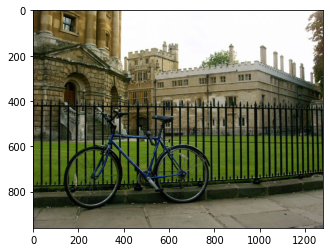

In [6]:

test=PIL.Image.open("/content/train/bikes/img9.jpg")
plt.imshow(test)

Building the model:

In [7]:

model=tf.keras.models.Sequential([
    #The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class  and 1 for the other.
    tf.keras.layers.Dense(1, activation='sigmoid')                               
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

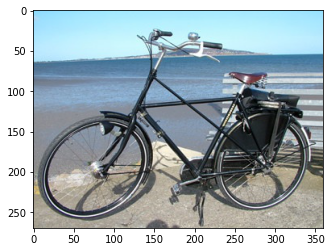

In [9]:
img = cv2.imread("/content/train/bikes/img83.jpg")
img.shape
plt.imshow(PIL.Image.open("/content/train/bikes/img83.jpg"))

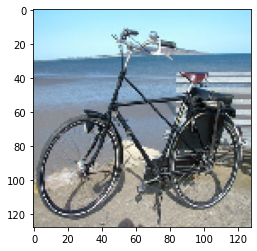

In [10]:
from keras.preprocessing import image

img_path='/content/train/bikes/img83.jpg'
img = image.load_img(img_path, target_size=(128, 128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()

In [11]:
layer_outputs = [layer.output for layer in model.layers[:6]]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


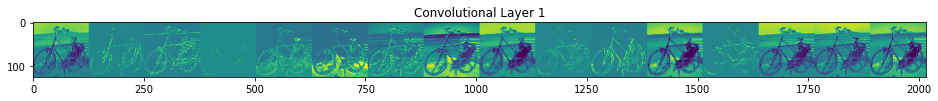

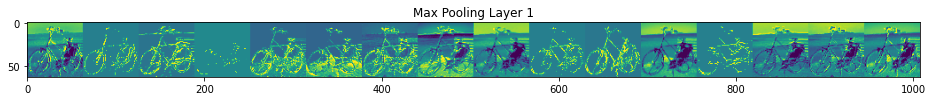

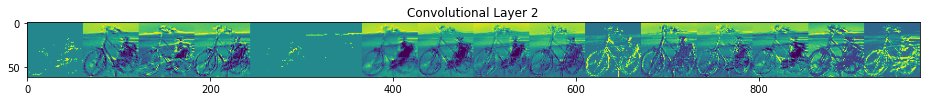

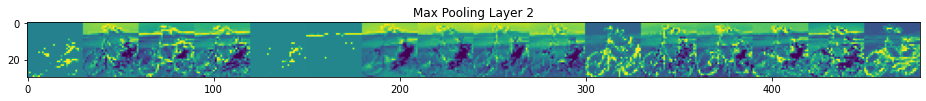

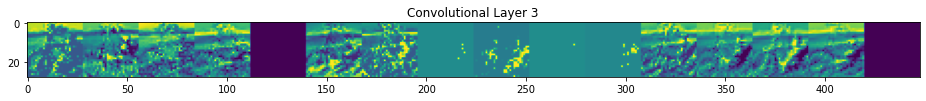

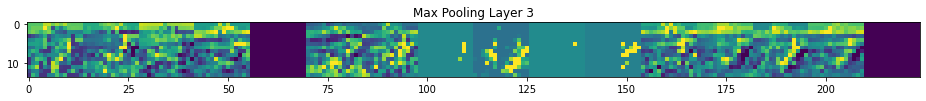

In [12]:
layer_names = ["Convolutional Layer 1", "Max Pooling Layer 1", "Convolutional Layer 2", "Max Pooling Layer 2", "Convolutional Layer 3", "Max Pooling Layer 3"]
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] 
    size = layer_activation.shape[1] 
    n_cols = n_features // images_per_row 
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): 
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() 
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, 
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')